In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from PIL import Image


In [123]:
import os
import sys 
import configparser
import pandas as pd 
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from matplotlib import cycler
from os.path import join as oj
from torch.utils.data import TensorDataset, DataLoader
import pickle as pkl
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sys.path.insert(0, "../src")
import my_data
import models
import seaborn as sns
import pickle as pkl
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [124]:
config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 

In [ ]:
img_list = my_data.load_data(data_path)

In [125]:
x, y= my_data.make_dataset(img_list)

In [6]:
files = os.listdir(data_path)

In [40]:
my_data = []
for file_name in files:
    im = Image.open(oj(data_path, file_name))
    my_data.append(np.asarray(im))

In [41]:
out_value = [my_data[1][0,0]]

In [46]:
shape = my_data[0].shape

In [49]:
mid_point = int(shape[0]/2)

In [51]:
mid_point

1024

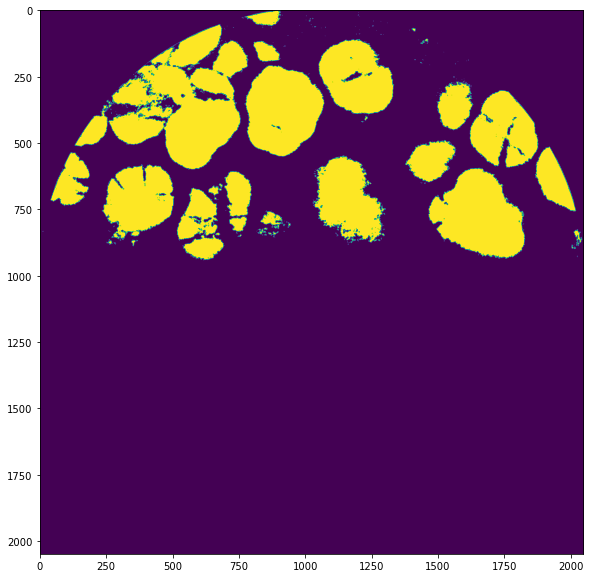

In [102]:
radius = 1030
xx, yy = np.mgrid[:shape[0], :shape[1]]
circle_shape= ((xx - mid_point) ** 2 + (yy - mid_point) ** 2) < (np.square(radius) )
fig, axes = plt.subplots(figsize=(10,10))
axes.imshow((my_data[0] * circle_shape))

In [120]:
cur_img = my_data[0]

img_size = 50
offset = 25
x_list = []
y_list = []
cur_x, cur_y = 0,0
while (cur_x <shape[0] - img_size):
    cur_y=0
    while (cur_y <shape[0] - img_size):
        x_list.append(cur_img[cur_x:cur_x+img_size, cur_y:cur_y+img_size])
        y_list.append((cur_img[cur_x:cur_x+img_size, cur_y:cur_y+img_size] > 150,
                       circle_shape[cur_x:cur_x+img_size, cur_y:cur_y+img_size]))
        cur_y+=offset
    cur_x+=offset
        
        
    

In [43]:
sample_img =np.copy(my_data[0][300:-300,300:-300])

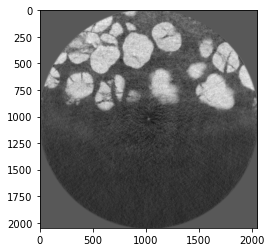

In [45]:
plt.imshow(my_data[0],cmap='gist_gray')

In [50]:
my_model = models.MyModel(input_size = 9,num_out_channels =1)

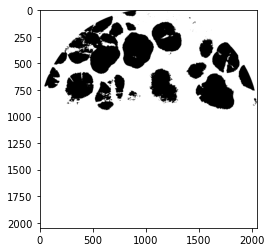

In [38]:
plt.imshow(my_data[0]<150,cmap='gist_gray')

In [ ]:
receptive_field = 9

In [33]:
my_data[0].shape

(2048, 2048)

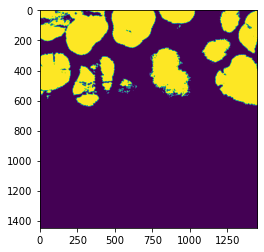

In [29]:
plt.imshow(sample_img>150)

(array([  2324., 396363., 900061., 261656.,  75265.,  58872.,  82623.,
        198975., 116337.,   4228.]),
 array([ 27. ,  49.8,  72.6,  95.4, 118.2, 141. , 163.8, 186.6, 209.4,
        232.2, 255. ]),
 <BarContainer object of 10 artists>)

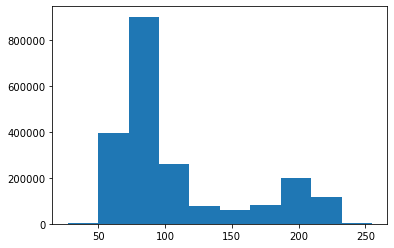

In [28]:
plt.hist(sample_img.reshape(-1))